# Time series components

## Data

In [1]:
import pandas as pd

df = pd.read_parquet("../../../data/EIA/fuel_type_data_california.parquet")
df

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2025-04-22 20:00:00-07:00,CAL,California,BAT,Battery storage,179,megawatthours
1,2025-04-22 20:00:00-07:00,CAL,California,COL,Coal,216,megawatthours
...,...,...,...,...,...,...,...
452546,2018-12-31 17:00:00-07:00,CAL,California,WAT,Hydro,2880,megawatthours
452547,2018-12-31 17:00:00-07:00,CAL,California,WND,Wind,2628,megawatthours


In [2]:
df = (df
 .query('fueltype == "SUN"')
 .set_index('period')['value'].to_frame()
 .sort_index()
 .loc['2019':'2024']
 .resample('4W')
 .mean()
)

df

,value
period,
2019-01-06 00:00:00-07:00,2201.500000
2019-02-03 00:00:00-07:00,2000.586310
...,...
2024-12-29 00:00:00-07:00,3531.580357
2025-01-26 00:00:00-07:00,4222.479167


In [3]:
df.columns = ['values']
df

,values
period,
2019-01-06 00:00:00-07:00,2201.500000
2019-02-03 00:00:00-07:00,2000.586310
...,...
2024-12-29 00:00:00-07:00,3531.580357
2025-01-26 00:00:00-07:00,4222.479167


In [4]:
series = df["values"]
series

period
2019-01-06 00:00:00-07:00    2201.500000
2019-02-03 00:00:00-07:00    2000.586310
                                ...     
2024-12-29 00:00:00-07:00    3531.580357
2025-01-26 00:00:00-07:00    4222.479167
Freq: 4W-SUN, Name: values, Length: 80, dtype: float64

## Individual component behaviour based on model

Components:

- Trend (T)
- Seasonality (S)
- Residual or Irregular Component (I)

Models:

- Additive model: $y_t = T_t + S_t + e_t$
- Multiplicative model: $y_t = T_t \times S_t \times e_t$

In [5]:
import statsmodels.api as sm

### Additive model

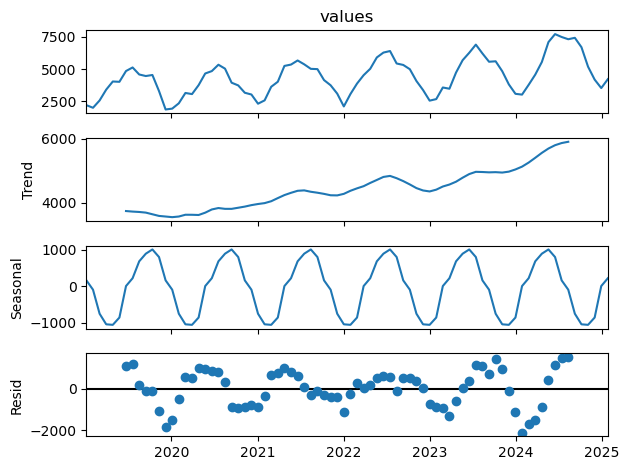

In [6]:
result = sm.tsa.seasonal_decompose(series, model='additive', period=12)
result.plot();

### Multiplicative model

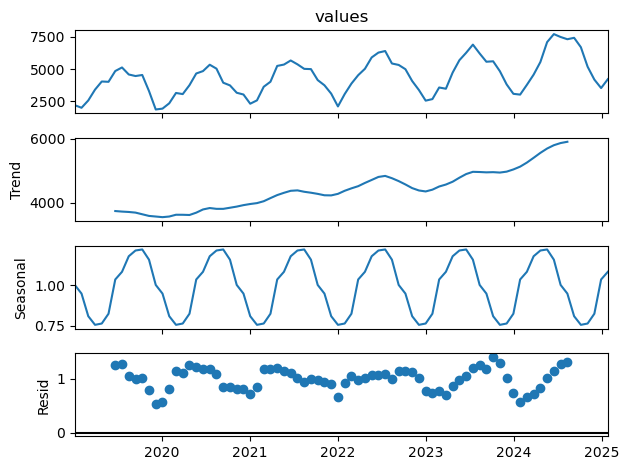

In [7]:
result = sm.tsa.seasonal_decompose(series, model='multiplicative', period=12)
result.plot();

## Math calculation

### Additive model

In [8]:
r = (df
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())

r

,values,trend,seasonal,residual
period,,,,
2019-06-23 00:00:00-07:00,4854.479167,3746.314298,1.036189,1.250546
2019-07-21 00:00:00-07:00,5131.361607,3729.616815,1.083876,1.269372
...,...,...,...,...
2024-07-14 00:00:00-07:00,7498.229167,5862.769655,1.002435,1.275850
2024-08-11 00:00:00-07:00,7324.133929,5902.322359,0.948840,1.307796


In [9]:
r['model_result'] = r.trend + r.seasonal + r.residual
r

,values,trend,seasonal,residual,model_result
period,,,,,
2019-06-23 00:00:00-07:00,4854.479167,3746.314298,1.036189,1.250546,3748.601033
2019-07-21 00:00:00-07:00,5131.361607,3729.616815,1.083876,1.269372,3731.970063
...,...,...,...,...,...
2024-07-14 00:00:00-07:00,7498.229167,5862.769655,1.002435,1.275850,5865.047940
2024-08-11 00:00:00-07:00,7324.133929,5902.322359,0.948840,1.307796,5904.578996


In [10]:
dfs = {}

In [11]:
dfs['additive'] = r

### Multiplicative model

In [12]:
r = (df
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())

r

,values,trend,seasonal,residual
period,,,,
2019-06-23 00:00:00-07:00,4854.479167,3746.314298,1.036189,1.250546
2019-07-21 00:00:00-07:00,5131.361607,3729.616815,1.083876,1.269372
...,...,...,...,...
2024-07-14 00:00:00-07:00,7498.229167,5862.769655,1.002435,1.275850
2024-08-11 00:00:00-07:00,7324.133929,5902.322359,0.948840,1.307796


In [13]:
r['model_result'] = r.trend * r.seasonal * r.residual
r

,values,trend,seasonal,residual,model_result
period,,,,,
2019-06-23 00:00:00-07:00,4854.479167,3746.314298,1.036189,1.250546,4854.479167
2019-07-21 00:00:00-07:00,5131.361607,3729.616815,1.083876,1.269372,5131.361607
...,...,...,...,...,...
2024-07-14 00:00:00-07:00,7498.229167,5862.769655,1.002435,1.275850,7498.229167
2024-08-11 00:00:00-07:00,7324.133929,5902.322359,0.948840,1.307796,7324.133929


In [14]:
dfs['multiplicative'] = r

## Visual comparison

In [16]:
df = pd.concat(dfs, axis=1).melt(ignore_index=False).reset_index()
df.columns = ["month", "model", "component", "value"]

df

,month,model,component,value
0,2019-06-23 00:00:00-07:00,additive,values,4854.479167
1,2019-07-21 00:00:00-07:00,additive,values,5131.361607
...,...,...,...,...
678,2024-07-14 00:00:00-07:00,multiplicative,model_result,7498.229167
679,2024-08-11 00:00:00-07:00,multiplicative,model_result,7324.133929


In [ ]:

from modules import utils
utils.configure_plotly_template(showlegend=True)

In [ ]:
import plotly.express as px

fig = px.line(
    data_frame=df,
    x='month',
    y='value',
    color='component',
    facet_col='model',
    facet_row='component',
    width=1500,
    height=1000,
    facet_col_spacing=0.1,
)

fig.update_yaxes(matches=None)

for attr in dir(fig.layout):
    if attr.startswith("yaxis"):
        axis = getattr(fig.layout, attr)
        if axis:
            axis.showticklabels = True
        
fig